## Pattern recognition: Lab 8
### Tasks:
* Plot the error
* Model XOR with the help of sigmoid
* Add Nesterov rule to learning equation


In [1]:
import numpy as np

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return x*(1.0-x)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

In [2]:
import numpy as np


class NeuralNetwork:

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [  4.99812582e-05]
[0 1] [ 0.99735084]
[1 0] [ 0.99581505]
[1 1] [-0.00154635]


epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000


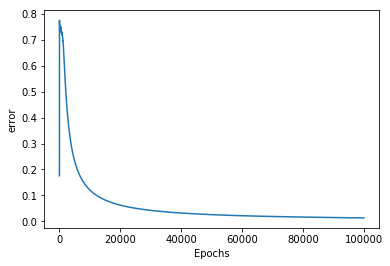

[0 0] [ 0.0068887   0.00414707  0.00413085]
[0 1] [ 0.98104681  0.98656568  0.98598949]
[1 0] [ 0.98641638  0.98918333  0.99218288]
[1 1] [ 0.02054557  0.01372552  0.01291365]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

class NeuralNetwork:

    def __init__(self, layers):
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime

# Set weights
        self.weights = []
# layers = [2,2,1]
# range of weight values (-1,1)
# input and hidden layers - random((2+1, 2+1)) : 3 x 3

        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
# output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
# Add column of ones to X
# This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        myList=[]
        avList=[]


        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
    
            for l in range(len(self.weights)):
                dot_value = np.dot(a[l], self.weights[l])
                activation = self.activation(dot_value)
                a.append(activation)
# output layer


            error = y[i] - a[-1]
            myList.append(np.sum(error**2))# mean squard error MSE
            deltas = [error * self.activation_prime(a[-1])]





# we need to begin at the second to last layer
# (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

# reverse
# [level3(output)->level2(hidden)] => [level2(hidden)->level3(output)]
            deltas.reverse()

# backpropagation
# 1. Multiply its output delta and input activation
# to get the gradient of the weight.
# 2. Subtract a ratio (percentage) of the gradient from the weight.

            cnt = 0
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                cnt =cnt + layer.T.dot(delta)
                self.weights[i] =self.weights[i]+ learning_rate * cnt#  momentum
            t = np.average(myList)
            avList.append(t)
            if k % 10000 == 0:
                print('epochs:', k)
                t = np.average(myList)
                avList.append(t)

# plt.show()
#print(myList)

#plt.plot(myList[1])
        plt.plot(avList)
        plt.xlabel('Epochs')
        plt.ylabel('error')
        plt.show()

    def predict(self, x):

        a = np.concatenate((np.ones(1).T, np.array(x)))

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a


if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1,0])
# X = np.array([[-1, -1],
# [-1, 1],
# [1, -1],
# [1, 1]])
# y = np.array([0, 1, 1, 0])

    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return x*(1.0-x)

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - (x)**2


class NeuralNetwork:

    def __init__(self, layers):
        self.errors = []
        self.activation = sigmoid
        self.activation_prime = sigmoid_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
           
            # output layer - random((2+1, 1)) : 3 x 1
            r = 2*np.random.random( (layers[i]+1 , layers[i+1])) -1
            self.weights.append(r)
#         print(self.weights) 
    def fit(self, X, y, learning_rate=0.2, epochs=100000 ,momentum = 0.4):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        
        X = np.concatenate((ones.T, X), axis=1)
#         i = np.random.randint(X.shape[0])
            
#         b = [X[i]]
#         print("Printing B:")
#         print(b)
#         print("self weights")
#         print(self.weights)
#         for l in range(len(self.weights)):
#                     dot_value = np.dot(b[l], self.weights[l])
                    
#                     activation = self.activation(dot_value)
#                     print("activation:")
#                     print(activation)
#                     b.append(activation)
#         print("last:")
#         print(b)
#         print(len(b))
#         error1 = y[i] - b[-1]
#         deltas1 = [error1 * self.activation_prime(b[-1])]
#         print(deltas1)
#         deltas1.append(deltas1[-1].dot(self.weights[1].T))
#         deltas1.reverse()
#         print(deltas1)
#         print("Updated weights:")
#         for i in range(len(self.weights)):
#                 layer1 = np.atleast_2d(b[i])
#                 delta1 = np.atleast_2d(deltas1[i])
#                 self.weights[i] += learning_rate * layer1.T.dot(delta1)
#                 print("layer")
#                 print(layer1.T)
#         print(self.weights)   
        #this is end
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            
            a = [X[i]]
            
            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
#             self.errors.append(error**2)/(k)
            deltas = [error * self.activation_prime(a[-1])]
#             plt.plot(deltas)
#             plt.axis()
            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            prev_weights_delta = []
            prev_3_1 = np.zeros((3,1))
            prev_3_3 = np.zeros((3,3))
            prev_weights_delta.append(prev_3_3)
            prev_weights_delta.append(prev_3_1)
            
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                #self.weights[i] += learning_rate * layer.T.dot(delta)
                
                delta = learning_rate * (layer.T.dot(delta)-(momentum * prev_weights_delta[i]))
                self.weights[i] += delta
                self.weights[i] += momentum * prev_weights_delta[i]
                prev_weights_delta[i] = delta
#             if k % 10000 == 0: 
#                 print('epochs:', k)
            
    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      
#          print(a)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
    for it in range(30):
        nn.fit(X, y)
        for e in X:
            print(e,nn.predict(e))

[0 0] [ 0.01181863]
[0 1] [ 0.9846658]
[1 0] [ 0.98127838]
[1 1] [ 0.01855562]
[0 0] [ 0.00766718]
[0 1] [ 0.98957725]
[1 0] [ 0.9871989]
[1 1] [ 0.01285688]
[0 0] [ 0.00597838]
[0 1] [ 0.99156175]
[1 0] [ 0.989689]
[1 1] [ 0.010409]
[0 0] [ 0.00503782]
[0 1] [ 0.99275726]
[1 0] [ 0.99117968]
[1 1] [ 0.00904539]
[0 0] [ 0.00441076]
[0 1] [ 0.99356995]
[1 0] [ 0.99214994]
[1 1] [ 0.00810175]
[0 0] [ 0.00394805]
[0 1] [ 0.99413537]
[1 0] [ 0.99285495]
[1 1] [ 0.00738584]
[0 0] [ 0.00360109]
[0 1] [ 0.99458599]
[1 0] [ 0.99340535]
[1 1] [ 0.00684701]
[0 0] [ 0.00332704]
[0 1] [ 0.99495408]
[1 0] [ 0.99383891]
[1 1] [ 0.00641124]
[0 0] [ 0.00309519]
[0 1] [ 0.99523276]
[1 0] [ 0.99419698]
[1 1] [ 0.00603366]
[0 0] [ 0.00291403]
[0 1] [ 0.99549449]
[1 0] [ 0.99450943]
[1 1] [ 0.00573975]
[0 0] [ 0.00275372]
[0 1] [ 0.99570751]
[1 0] [ 0.99477279]
[1 1] [ 0.00547697]
[0 0] [ 0.00261619]
[0 1] [ 0.99589348]
[1 0] [ 0.9950031]
[1 1] [ 0.0052484]
[0 0] [ 0.00249886]
[0 1] [ 0.99606462]
[1 0] [ 